In [ ]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import re, string
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.express as px
!pip install nltk
import nltk
nltk.download([
   "names",
   "stopwords",
   "state_union",
   "wordnet",
   "averaged_perceptron_tagger",
   "vader_lexicon",
   "punkt",
])
nltk.download('state_union')
nltk.download('stopwords')
nltk.download('punkt')
import io
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Package state_union is alr

In [ ]:
#import dataset
data = pd.read_csv('/content/Elon musk.csv')

# **INITIAL EXPLORATION**

In [ ]:
data.shape

(3060, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweets    3060 non-null   object
 1   Retweets  3060 non-null   int64 
 2   Likes     3060 non-null   int64 
 3   Date      3060 non-null   object
dtypes: int64(2), object(2)
memory usage: 95.8+ KB


In [ ]:
data.head()

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,27/10/2022 16:17
1,@ZubyMusic Absolutely,755,26737,27/10/2022 13:19
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,27/10/2022 13:08
3,@BillyM2k 👻,802,19353,27/10/2022 02:32
4,Meeting a lot of cool people at Twitter today!,9366,195546,26/10/2022 21:39


In [ ]:
data.columns

Index(['Tweets', 'Retweets', 'Likes', 'Date'], dtype='object')

In [ ]:
data.isna().any()

Tweets      False
Retweets    False
Likes       False
Date        False
dtype: bool

# **TASK 1 DATA PREPROCESSING**

## **CREATING ADDITIONAL FEATURES**

In [ ]:
#create features to show whether tweets contain url or images
from urllib.parse import urlparse

In [ ]:
def count_urls(row):
  text= row['Tweets']
  parsed = urlparse(text)
  if parsed.scheme and parsed.netloc:
    return 1
  else:
    return 0

In [ ]:
data["num_urls"] = data.apply(count_urls, axis= 1)

In [ ]:
def contains_image(row):
  text = row['Tweets']
  if 'pic.twitter.com' in text:
    return True
  else:
    return False

In [ ]:
data["contains_image"] = data.apply(contains_image, axis= 1)

## **CHANGING DATA TYPES**

In [ ]:
data['Tweets'] = data['Tweets'].astype(str)
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tweets          3060 non-null   object        
 1   Retweets        3060 non-null   int64         
 2   Likes           3060 non-null   int64         
 3   Date            3060 non-null   datetime64[ns]
 4   num_urls        3060 non-null   int64         
 5   contains_image  3060 non-null   bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(1)
memory usage: 122.6+ KB


## **CLEANING TWEETS**

In [ ]:
#Adding stop words
from nltk.corpus import stopwords
stop = stopwords.words("english")

#extend stopwords list
stop.extend(["from", "re","https", "co", "t", "I", "That","This","There","amp", 'It'])


In [ ]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
data["Tweets"] = data["Tweets"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
#lowercase tweets
data['Tweets'] = data['Tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [ ]:
data['Tweets'] = data['Tweets'].astype(str)

In [ ]:
#Handling Twitter Handles
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

    #remove twitter handles
data['Tweets'] = np.vectorize(remove_pattern)(data['Tweets'], "@[\w]*")

In [ ]:
#remove urls so as to not affect sentiment analysis
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

In [ ]:
def clean_data(data):
#replace URL of a text
    data['Tweets'] = data['Tweets'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

In [ ]:
data.head()

,Tweets,Retweets,Likes,Date,num_urls,contains_image
0,🤣 thanks,209,7021,2022-10-27 16:17:00,0,False
1,absolutely,755,26737,2022-10-27 13:19:00,0,False
2,dear twitter advertisers https://t.co/gmwhminpas,55927,356623,2022-10-27 13:08:00,0,False
3,👻,802,19353,2022-10-27 02:32:00,0,False
4,meeting lot cool people twitter today!,9366,195546,2022-10-26 21:39:00,0,False


In [ ]:
data['Tweets'] = data['Tweets'].astype(str)

In [ ]:
#Tokenization
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

data['Tweets_Token']=data['Tweets'].apply(regexp.tokenize)

In [ ]:
data.head(20)

,Tweets,Retweets,Likes,Date,num_urls,contains_image,Tweets_Token
0,🤣 thanks,209,7021,2022-10-27 16:17:00,0,False,[thanks]
1,absolutely,755,26737,2022-10-27 13:19:00,0,False,[absolutely]
2,dear twitter advertisers https://t.co/gmwhminpas,55927,356623,2022-10-27 13:08:00,0,False,"[dear, twitter, advertisers, https, t, co, gmw..."
3,👻,802,19353,2022-10-27 02:32:00,0,False,[]
4,meeting lot cool people twitter today!,9366,195546,2022-10-26 21:39:00,0,False,"[meeting, lot, cool, people, twitter, today]"
5,entering twitter hq – let sink in! https://t.c...,145520,1043592,2022-10-26 18:45:00,0,False,"[entering, twitter, hq, let, sink, in, https, ..."
6,🤣💪,194,3611,2022-10-26 17:18:00,0,False,[]
7,🤣,117,2848,2022-10-26 17:14:00,0,False,[]
8,definitely closer citizen journalism – local ...,699,10189,2022-10-26 17:05:00,0,False,"[definitely, closer, citizen, journalism, loca..."
9,nobody bats 1000 🤷‍♂️,126,2920,2022-10-26 15:42:00,0,False,"[nobody, bats, 1000]"


# **TASK 2 STATISTICAL ANALYSIS**

In [ ]:
data.shape

(3060, 7)

In [ ]:
data.describe()

,Retweets,Likes,num_urls
count,3060.000000,3.060000e+03,3060.000000
mean,5847.451634,7.074538e+04,0.028105
std,21662.545853,1.965653e+05,0.165299
min,41.000000,9.330000e+02,0.000000
25%,300.750000,5.914750e+03,0.000000
50%,786.000000,1.521050e+04,0.000000
75%,3366.250000,5.649675e+04,0.000000
max,681707.000000,4.780787e+06,1.000000


In [ ]:
data.columns

Index(['Tweets', 'Retweets', 'Likes', 'Date', 'num_urls', 'contains_image',
       'Tweets_Token'],
      dtype='object')

In [ ]:
data.head

<bound method NDFrame.head of                                                  Tweets  Retweets   Likes  \
0                                              🤣 thanks       209    7021   
1                                            absolutely       755   26737   
2      dear twitter advertisers https://t.co/gmwhminpas     55927  356623   
3                                                     👻       802   19353   
4                meeting lot cool people twitter today!      9366  195546   
...                                                 ...       ...     ...   
3055    just manganese alternative iron &amp; phosph...       171    3173   
3056                                            exactly       145    4234   
3057   your policies directly responsible outrageous...       421    6144   
3058                                   you voted office       484    7029   
3059                  cb radios free govt/media control     11302  113429   

                    Date  num_urls  contains_

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tweets          3060 non-null   object        
 1   Retweets        3060 non-null   int64         
 2   Likes           3060 non-null   int64         
 3   Date            3060 non-null   datetime64[ns]
 4   num_urls        3060 non-null   int64         
 5   contains_image  3060 non-null   bool          
 6   Tweets_Token    3060 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(3), object(2)
memory usage: 146.6+ KB


In [ ]:
data.isna().any()

Tweets            False
Retweets          False
Likes             False
Date              False
num_urls          False
contains_image    False
Tweets_Token      False
dtype: bool

In [ ]:
data['Tweets'] = data['Tweets'].astype(str)

In [ ]:
from nltk.probability import FreqDist
fd = FreqDist(data['Tweets'])
print(fd)
fd.most_common(5)

<FreqDist with 2655 samples and 3060 outcomes>


[(' 🤣', 79), ('  🤣', 32), (' yes', 22), (' exactly', 21), (' true', 18)]

In [ ]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
words = data['Tweets'].apply(nltk.word_tokenize).sum()
# Create a Text object
text_3 = nltk.Text(words)
# Find bigram collocations
finder = BigramCollocationFinder.from_words(text_3, window_size=3)
scored = finder.score_ngrams(BigramAssocMeasures().raw_freq)
collocations = sorted(scored, key=lambda x: -x[1])
print(collocations[:10])

[(('https', ':'), 0.007100329129839873), (('&', ';'), 0.0057135460966680224), (('&', 'amp'), 0.005325246847379905), (('amp', ';'), 0.005325246847379905), (('’', 's'), 0.003642616767131393), (('’', 't'), 0.0028290373876705744), (('.', ','), 0.0017381014015753855), ((',', '’'), 0.0015901778780370549), (('i', '’'), 0.0015901778780370549), (('.', '’'), 0.0012943308309603934)]


# **DATA VISUALISATION**

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 128175 (\N{HUNDRED POINTS SYMBOL}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128175 (\N{HUNDRED POINTS SYMBOL}) missing from current font.



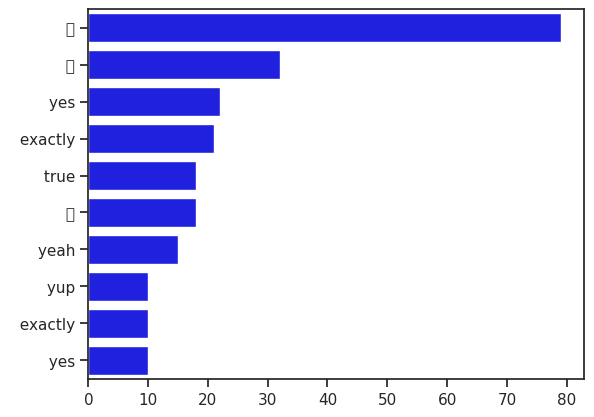

In [ ]:
#Visualising the Most Common Words
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

#plot of common words
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

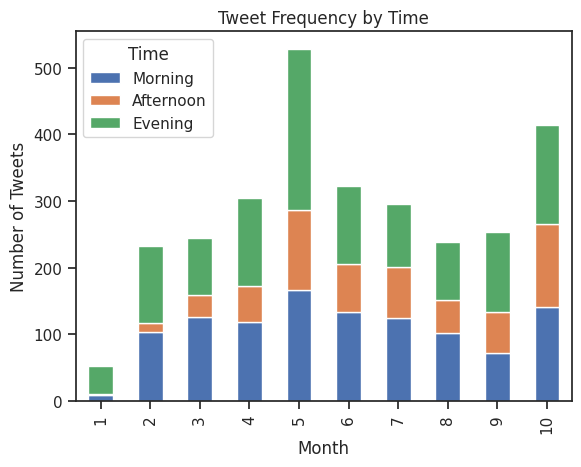

In [ ]:
data1 = data[data['Date'].dt.year.isin([2022])]

#Convert to a pandas DatetimeIndex
year = pd.DatetimeIndex(data1['Date']).year
hour = pd.DatetimeIndex(data1['Date']).hour
month = pd.DatetimeIndex(data1['Date']).month


#Create bins for diffrent times of the day
bins = [0, 11, 16, 23]
labels = ['Morning', 'Afternoon', 'Evening']
time_of_day = pd.cut(hour, bins=bins, labels=labels)

#Group the tweets by month and time of day
grouped = data1.groupby([month, time_of_day])['Tweets'].count().unstack()

# Visualise using stacked bars
ax = grouped.plot(kind='bar', stacked=True, title='Tweet Frequency by Time')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Tweets')
ax.legend(title='Time')
plt.show()

In [ ]:
#create a new feature named Month
data["Month"] = pd.DatetimeIndex(data1['Date']).month

<Axes: >

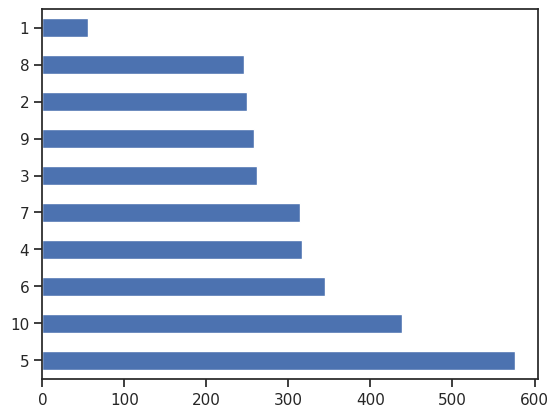

In [ ]:
data.Month.value_counts().plot.barh()

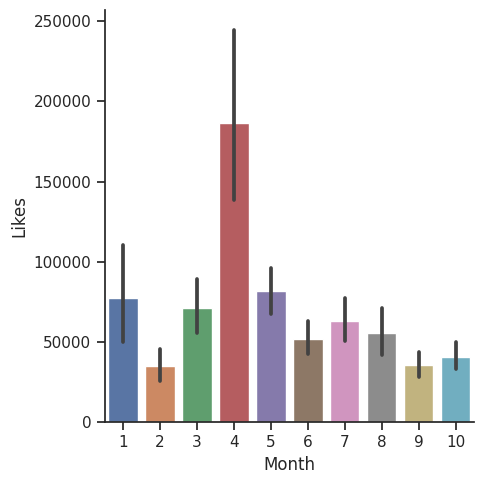

In [ ]:
sns.catplot(data= data, x="Month", y="Likes", kind="bar")

In [ ]:
figure = px.histogram(data, x = "Month",
                      y = "Retweets",
                      title= "Retweets by Month")
figure.show()

In [ ]:
#Create new feature Hour
data['Hour'] = pd.DatetimeIndex(data1['Date']).hour


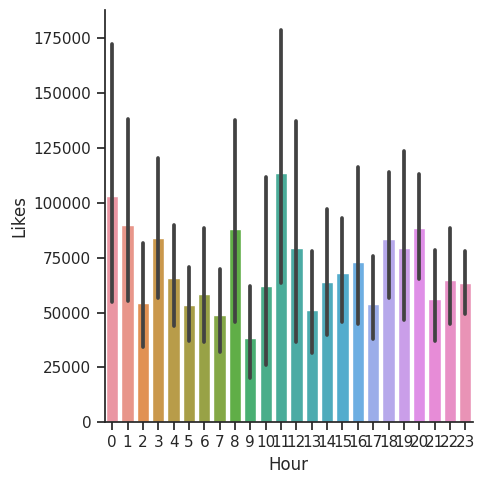

In [ ]:
sns.catplot(data= data, x="Hour", y="Likes", kind="bar")

In [ ]:
#create new feature Time
data["Time"] = time_of_day

<Axes: >

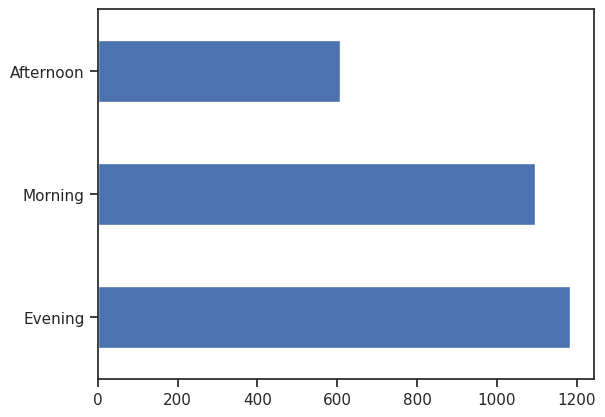

In [ ]:
data.Time.value_counts().plot.barh()

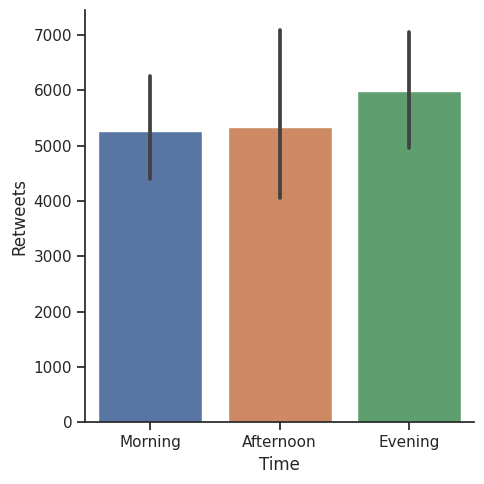

In [ ]:
sns.catplot(data= data, x="Time", y="Retweets", kind="bar")

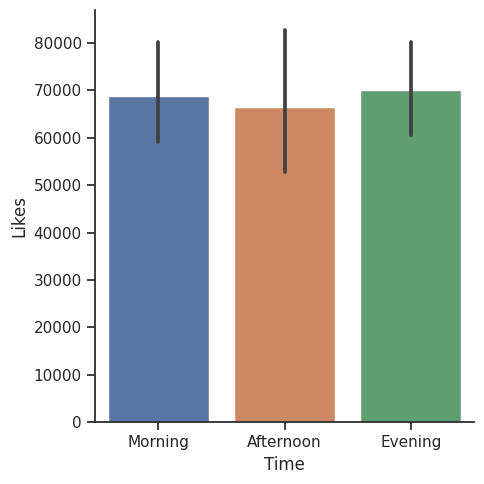

In [ ]:
sns.catplot(data= data, x="Time", y="Likes", kind="bar")

In [ ]:
#create new feature tweet length
data['TweetLength'] = data['Tweets'].apply(len)

# **TASK 3 EXPLORATORY DATA MINING**

### **WORD CLOUD**

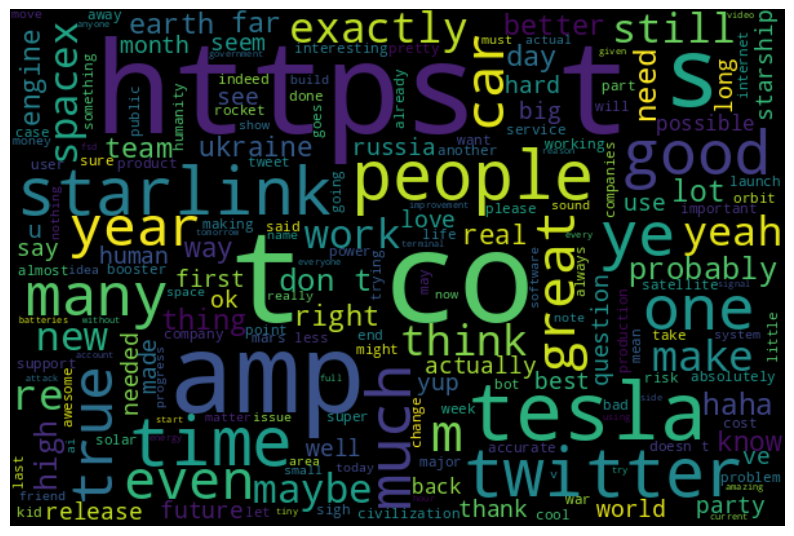

In [ ]:
#Generate a Word Cloud
wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(' '.join(data["Tweets"]))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

### **SENTIMENT ANALYSIS**

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
analyzer= SentimentIntensityAnalyzer()

In [ ]:
(data['TweetScore'])= data['Tweets'].apply(analyzer.polarity_scores)
data.head()

,Tweets,Retweets,Likes,Date,num_urls,contains_image,Tweets_Token,Month,Hour,Time,TweetLength,TweetScore
0,🤣 thanks,209,7021,2022-10-27 16:17:00,0,False,[thanks],10,16,Afternoon,9,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
1,absolutely,755,26737,2022-10-27 13:19:00,0,False,[absolutely],10,13,Afternoon,11,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,dear twitter advertisers https://t.co/gmwhminpas,55927,356623,2022-10-27 13:08:00,0,False,"[dear, twitter, advertisers, https, t, co, gmw...",10,13,Afternoon,48,"{'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'comp..."
3,👻,802,19353,2022-10-27 02:32:00,0,False,[],10,2,Morning,2,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
4,meeting lot cool people twitter today!,9366,195546,2022-10-26 21:39:00,0,False,"[meeting, lot, cool, people, twitter, today]",10,21,Evening,38,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp..."


In [ ]:
data.tail()

,Tweets,Retweets,Likes,Date,num_urls,contains_image,Tweets_Token,Month,Hour,Time,TweetLength,TweetScore
3055,just manganese alternative iron &amp; phosph...,171,3173,2022-01-27 22:01:00,0,False,"[just, manganese, alternative, iron, amp, phos...",1,22,Evening,94,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3056,exactly,145,4234,2022-01-27 21:23:00,0,False,[exactly],1,21,Evening,9,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3057,your policies directly responsible outrageous...,421,6144,2022-01-27 21:13:00,0,False,"[your, policies, directly, responsible, outrag...",1,21,Evening,90,"{'neg': 0.176, 'neu': 0.64, 'pos': 0.184, 'com..."
3058,you voted office,484,7029,2022-01-27 21:12:00,0,False,"[you, voted, office]",1,21,Evening,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3059,cb radios free govt/media control,11302,113429,2022-01-27 21:00:00,0,False,"[cb, radios, free, govt, media, control]",1,21,Evening,33,"{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'comp..."


In [ ]:
def sentiment(row):
  text = row['TweetScore']
  polarity = "neutral"

  if(text['compound']>= 0.05):
    polarity = "positive"

  elif(text['compound'] <= -0.05):
    polarity = "negative"

  return polarity



In [ ]:
data["Sentiment"] = data.apply(sentiment, axis= 1)

In [ ]:
data.head()

,Tweets,Retweets,Likes,Date,num_urls,contains_image,Tweets_Token,Month,Hour,Time,TweetLength,TweetScore,Sentiment
0,🤣 thanks,209,7021,2022-10-27 16:17:00,0,False,[thanks],10,16,Afternoon,9,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",positive
1,absolutely,755,26737,2022-10-27 13:19:00,0,False,[absolutely],10,13,Afternoon,11,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
2,dear twitter advertisers https://t.co/gmwhminpas,55927,356623,2022-10-27 13:08:00,0,False,"[dear, twitter, advertisers, https, t, co, gmw...",10,13,Afternoon,48,"{'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'comp...",positive
3,👻,802,19353,2022-10-27 02:32:00,0,False,[],10,2,Morning,2,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",neutral
4,meeting lot cool people twitter today!,9366,195546,2022-10-26 21:39:00,0,False,"[meeting, lot, cool, people, twitter, today]",10,21,Evening,38,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...",positive


In [ ]:
data["Sentiment"].value_counts()

neutral     1449
positive    1172
negative     439
Name: Sentiment, dtype: int64

<Axes: >

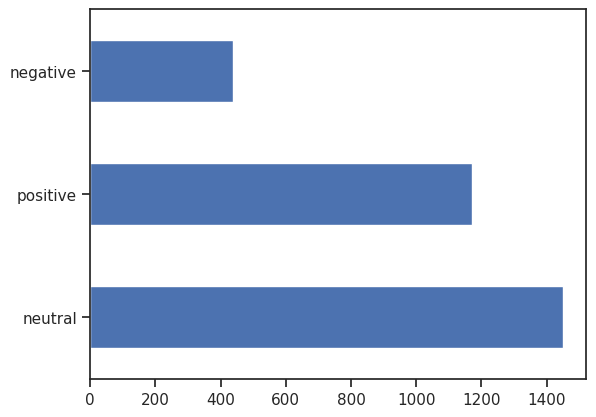

In [ ]:
data.Sentiment.value_counts().plot.barh()

In [ ]:
toplikes= data[(data['Likes'] >= 2500000)]
toplikes.head(10)

,Tweets,Retweets,Likes,Date,num_urls,contains_image,Tweets_Token,Month,Hour,Time,TweetLength,TweetScore,Sentiment
2215,"listen, can’t miracles ok https://t.co/z7dvlmuxy8",212854,2581112,2022-04-28 01:57:00,0,False,"[listen, can, t, miracles, ok, https, t, co, z...",4,1,Morning,49,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",positive
2216,let’s make twitter maximum fun!,194742,2650644,2022-04-28 01:53:00,0,False,"[let, s, make, twitter, maximum, fun]",4,1,Morning,31,"{'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'comp...",positive
2219,next i’m buying coca-cola put cocaine back,681707,4780787,2022-04-28 00:56:00,0,False,"[next, i, m, buying, coca, cola, put, cocaine,...",4,0,NaN,42,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
2243,🚀💫♥️ yesss!!! ♥️💫🚀 https://t.co/0t9hzuhuh6,348158,2608578,2022-04-25 19:43:00,0,False,"[yesss, https, t, co, 0t9hzuhuh6]",4,19,Evening,42,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
2244,"hope even worst critics remain twitter, free s...",368279,3232772,2022-04-25 16:12:00,0,False,"[hope, even, worst, critics, remain, twitter, ...",4,16,Afternoon,57,"{'neg': 0.36, 'neu': 0.286, 'pos': 0.354, 'com...",neutral


In [ ]:
data[(data['Sentiment'] == 'negative')]

,Tweets,Retweets,Likes,Date,num_urls,contains_image,Tweets_Token,Month,Hour,Time,TweetLength,TweetScore,Sentiment
13,"“the new york times emerged new, chaotic actor...",10733,100922,2022-10-26 14:48:00,0,False,"[the, new, york, times, emerged, new, chaotic,...",10,14,Afternoon,168,"{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'comp...",negative
41,"ownerssv that’s plan, unless damaged ...",235,3806,2022-10-24 13:39:00,0,False,"[ownerssv, that, s, plan, unless, damaged, tes...",10,13,Afternoon,184,"{'neg': 0.105, 'neu': 0.761, 'pos': 0.134, 'co...",negative
43,"child, found simple useful real life: mere ...",272,3692,2022-10-24 13:28:00,0,False,"[child, found, simple, useful, real, life, mer...",10,13,Afternoon,177,"{'neg': 0.135, 'neu': 0.764, 'pos': 0.101, 'co...",negative
44,"and don’t even house, let alone “mansion”, d...",635,8781,2022-10-24 13:19:00,0,False,"[and, don, t, even, house, let, alone, mansion...",10,13,Afternoon,51,"{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'comp...",negative
50,"before dod even came back answer, told spac...",1094,11673,2022-10-24 02:37:00,0,False,"[before, dod, even, came, back, answer, told, ...",10,2,Morning,101,"{'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'comp...",negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,if canadian government suppressing peaceful p...,1055,7260,2022-01-30 16:53:00,0,False,"[if, canadian, government, suppressing, peacef...",1,16,Afternoon,121,"{'neg': 0.263, 'neu': 0.559, 'pos': 0.179, 'co...",negative
3029,"now big automotive advertisers making evs, se...",1341,16612,2022-01-30 00:42:00,0,False,"[now, big, automotive, advertisers, making, ev...",1,0,NaN,161,"{'neg': 0.098, 'neu': 0.816, 'pos': 0.086, 'co...",negative
3035,we need serious tonnage mars,490,9544,2022-01-29 11:21:00,0,False,"[we, need, serious, tonnage, mars]",1,11,Morning,30,"{'neg': 0.245, 'neu': 0.755, 'pos': 0.0, 'comp...",negative
3048,and darkness bind https://t.co/bvxr4httq1,33028,195919,2022-01-27 23:56:00,0,False,"[and, darkness, bind, https, t, co, bvxr4httq1]",1,23,Evening,41,"{'neg': 0.4, 'neu': 0.6, 'pos': 0.0, 'compound...",negative


In [ ]:
#create a new column based on compound scores
data['Compound'] = [analyzer.polarity_scores(x)['compound'] for x in data['Tweets']]


In [ ]:
data.head()

,Tweets,Retweets,Likes,Date,num_urls,contains_image,Tweets_Token,Month,Hour,Time,TweetLength,TweetScore,Sentiment,Compound
0,🤣 thanks,209,7021,2022-10-27 16:17:00,0,False,[thanks],10,16,Afternoon,9,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",positive,0.4404
1,absolutely,755,26737,2022-10-27 13:19:00,0,False,[absolutely],10,13,Afternoon,11,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.0000
2,dear twitter advertisers https://t.co/gmwhminpas,55927,356623,2022-10-27 13:08:00,0,False,"[dear, twitter, advertisers, https, t, co, gmw...",10,13,Afternoon,48,"{'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'comp...",positive,0.3818
3,👻,802,19353,2022-10-27 02:32:00,0,False,[],10,2,Morning,2,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",neutral,0.0000
4,meeting lot cool people twitter today!,9366,195546,2022-10-26 21:39:00,0,False,"[meeting, lot, cool, people, twitter, today]",10,21,Evening,38,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...",positive,0.3802


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tweets          3060 non-null   object        
 1   Retweets        3060 non-null   int64         
 2   Likes           3060 non-null   int64         
 3   Date            3060 non-null   datetime64[ns]
 4   num_urls        3060 non-null   int64         
 5   contains_image  3060 non-null   bool          
 6   Tweets_Token    3060 non-null   object        
 7   Month           3060 non-null   int64         
 8   Hour            3060 non-null   int64         
 9   Time            2887 non-null   category      
 10  TweetLength     3060 non-null   int64         
 11  TweetScore      3060 non-null   object        
 12  Sentiment       3060 non-null   object        
 13  Compound        3060 non-null   float64       
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), 

In [ ]:
#Sort by number of likes and choose top 5 tweets
top5_tweets = data.sort_values("Likes", ascending=False).head(5)

In [ ]:
for i, tweet in top5_tweets.iterrows():
    print(f"{tweet['Tweets']}\nLikes: {tweet['Likes']}\n")

next i’m buying coca-cola put cocaine back
Likes: 4780787

hope even worst critics remain twitter, free speech means
Likes: 3232772

let’s make twitter maximum fun!
Likes: 2650644

🚀💫♥️ yesss!!! ♥️💫🚀 https://t.co/0t9hzuhuh6
Likes: 2608578

listen, can’t miracles ok https://t.co/z7dvlmuxy8
Likes: 2581112



In [ ]:
# Create dataFrame showing counts of positive, negative, and neutral tweets
sentiment_c = top5_tweets.groupby(['Sentiment'])['Tweets'].count().reset_index()

In [ ]:
sentiment_c

,Sentiment,Tweets
0,neutral,3
1,positive,2


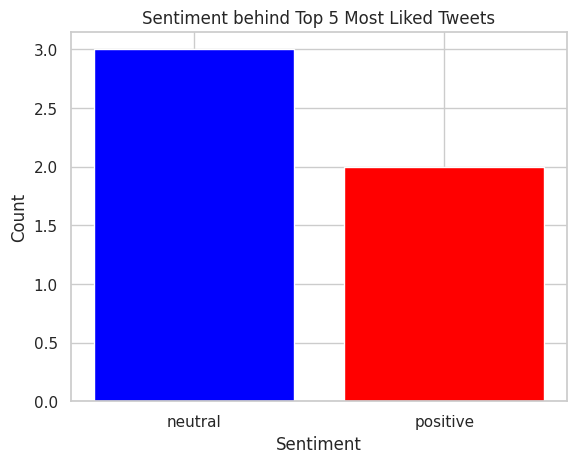

In [ ]:
# Create a stacked bar
sns.set_style('whitegrid')
plt.bar(sentiment_c['Sentiment'], sentiment_c['Tweets'], color=['blue', 'red', 'purple'])
plt.title('Sentiment behind Top 5 Most Liked Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# **TASK 4 MACHINE LEARNING**

In [ ]:
#Prepare the data to be fed into the modelling tool
data['Sentiment'] = data['Sentiment'].replace("neutral", 0)
data['Sentiment'] = data['Sentiment'].replace("negative", 1)
data['Sentiment'] = data['Sentiment'].replace("positive", 2)

In [ ]:
#Handle Missing Values in Time
data['Time'].fillna('Morning', inplace = True)


In [ ]:
data['Time'] = data['Time'].replace("Morning", 0)
data['Time'] = data['Time'].replace("Afternoon", 1)
data['Time'] = data['Time'].replace("Evening", 2)

In [ ]:
data['Time'] = pd.to_numeric(data['Time']).astype('Int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tweets          3060 non-null   object        
 1   Retweets        3060 non-null   int64         
 2   Likes           3060 non-null   int64         
 3   Date            3060 non-null   datetime64[ns]
 4   num_urls        3060 non-null   int64         
 5   contains_image  3060 non-null   bool          
 6   Tweets_Token    3060 non-null   object        
 7   Month           3060 non-null   int64         
 8   Hour            3060 non-null   int64         
 9   Time            3060 non-null   Int64         
 10  TweetLength     3060 non-null   int64         
 11  TweetScore      3060 non-null   object        
 12  Sentiment       3060 non-null   int64         
 13  Compound        3060 non-null   float64       
dtypes: Int64(1), bool(1), datetime64[ns](1), float64(1), int

In [ ]:
import scipy.stats as stats
corr, _ = stats.pearsonr (data['Compound'], data['Likes'])
corr


-0.0082140509781245

### **Building the Models**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
y = data.Likes
x = pd.DataFrame(data[['TweetLength', 'Hour', 'Month', 'Retweets', 'Compound']])
# implementing train-test-split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 23)


In [ ]:
#LINEAR REGRESSION
lm = LinearRegression()
model = lm.fit(x_train, y_train)

In [ ]:
print(model.intercept_)

28204.139675807128


In [ ]:
print(model.coef_)

[ -70.59242428 -267.12451454 -343.80149836    8.62090923 8456.01456404]


In [ ]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])


,Coeff
TweetLength,-70.592424
Hour,-267.124515
Month,-343.801498
Retweets,8.620909
Compound,8456.014564


from the coefficient, it is seen that as the the sentiment increases by one unit (in this case from neutral to negative to positive, the number of likes decreases

In [ ]:
#get the r squared
model.score(x_train, y_train)

0.918282611582187

In [ ]:
#make predictions
lm_pred = model.predict(x_test)

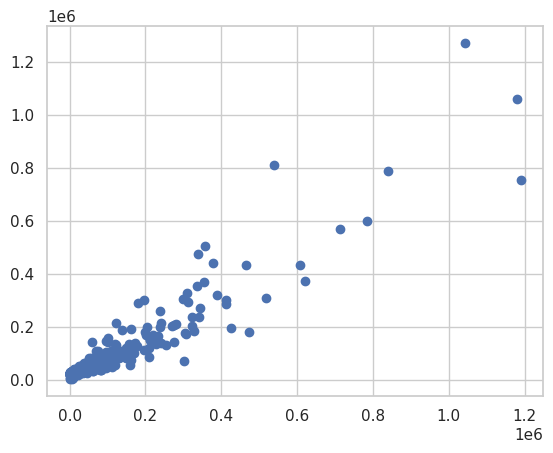

In [ ]:
plt.scatter(y_test, lm_pred)

In [ ]:
#Testing Performance
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, lm_pred), 2))

Mean absolute error = 25737.23


In [ ]:
#root mean squared error
np.sqrt(sm.mean_squared_error(y_test,lm_pred))

45950.424558224746

In [ ]:
score =r2_score(y_test, lm_pred)
print("The accuracy of our model is {}%".format(round(score,2)*100))

The accuracy of our model is 87.0%


In [ ]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=23)

# Fit the model on the training data
rf.fit(x_train, y_train)


RandomForestRegressor(random_state=23)

In [ ]:
rf.score(x_train, y_train)

0.9853236180402801

In [ ]:
# Make predictions on the testing data
rf_pred = rf.predict(x_test)

In [ ]:
# Calculate the mean squared error
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, rf_pred), 2))

Mean absolute error = 17035.49


In [ ]:
np.sqrt(sm.mean_squared_error(y_test,rf_pred))

46184.86501636952

In [ ]:
model2score =r2_score(y_test, rf_pred)
print("The accuracy of our model is {}%".format(round(model2score,2)*100))

The accuracy of our model is 87.0%


In [ ]:
#DECISION TREE REGRESSOR
regressor = DecisionTreeRegressor()
model3 = regressor.fit(x_train, y_train)

In [ ]:
regressor_pred =regressor.predict(x_test)

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, regressor_pred), 2))

Mean absolute error = 21853.85


In [ ]:
np.sqrt(sm.mean_squared_error(y_test,regressor_pred))

63844.57531834686

In [ ]:
model3score =r2_score(y_test, regressor_pred)
print("The accuracy of our model is {}%".format(round(model3score,2)*100))

The accuracy of our model is 75.0%
